In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import os
import cv2

import tensorflow as tf
from keras.utils import np_utils

from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten

# Loading and Splitting Dataset

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [3]:
print(x_train.shape, x_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)


In [4]:
x_train[0].shape

(32, 32, 3)

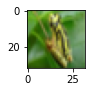

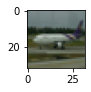

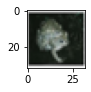

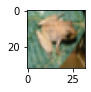

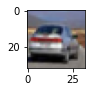

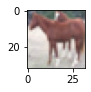

In [5]:
for i in range(232, 238):
    plt.subplot(121+i)
    img = x_train[i]
    plt.imshow(img)
    plt.show()

# Preprocessing Dataset

In [6]:
x_train = x_train.reshape(x_train.shape[0], 32, 32, 3)
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /=255
classes = 10

print("Shape before one-hot encoding:", y_train.shape)
y_train = np_utils.to_categorical(y_train, classes)
y_test = np_utils.to_categorical(y_test, classes)
print("Shape after one-hot encoding:", y_test.shape)

Shape before one-hot encoding: (50000, 1)
Shape after one-hot encoding: (10000, 10)


# Model Building

In [7]:
model = Sequential()

#Conovlutional Layers
model.add(Conv2D(50, kernel_size = (3,3), strides = (1,1), padding = 'same', activation = 'relu', input_shape = (32,32,3)))

model.add(Conv2D(75, kernel_size = (3,3), strides = (1,1), padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125, kernel_size = (3,3), strides = (1,1), padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Hidden Layers
model.add(Dense(500, activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation = 'relu'))
model.add(Dropout(0.3))

#Output Layer
model.add(Dense(10, activation = 'softmax'))

#Compliling
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

#Model Training
model.fit(x_train, y_train, batch_size=128, epochs = 29, validation_data = (x_test, y_test))

2022-01-07 13:26:05.849678: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-07 13:26:05.954799: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-07 13:26:05.955812: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-07 13:26:05.957435: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Epoch 1/29


2022-01-07 13:26:11.306283: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


391/391 [==============================] - 13s 14ms/step - loss: 1.6064 - accuracy: 0.4085 - val_loss: 1.2109 - val_accuracy: 0.5620
Epoch 2/29
391/391 [==============================] - 5s 13ms/step - loss: 1.1109 - accuracy: 0.6038 - val_loss: 0.9064 - val_accuracy: 0.6942
Epoch 3/29
391/391 [==============================] - 5s 13ms/step - loss: 0.9215 - accuracy: 0.6768 - val_loss: 0.8178 - val_accuracy: 0.7191
Epoch 4/29
391/391 [==============================] - 5s 13ms/step - loss: 0.8033 - accuracy: 0.7214 - val_loss: 0.7316 - val_accuracy: 0.7457
Epoch 5/29
391/391 [==============================] - 5s 14ms/step - loss: 0.7129 - accuracy: 0.7509 - val_loss: 0.7042 - val_accuracy: 0.7571
Epoch 6/29
391/391 [==============================] - 5s 13ms/step - loss: 0.6467 - accuracy: 0.7708 - val_loss: 0.6785 - val_accuracy: 0.7669
Epoch 7/29
391/391 [==============================] - 5s 13ms/step - loss: 0.5956 - accuracy: 0.7905 - val_loss: 0.6653 - val_accuracy: 0.7708
Epoch 8/2

# Predicting

In [8]:
class_num = range(0, 10)
names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

#zipping the names and class_num to make a dictionary of class_labels 
class_labels = dict(zip(class_num, names))

#Generate batches of 9 images to predict
batch = x_test[100:109]
labels = np.argmax(y_test[100:109], axis = -1)

#make predictions
predictions = model.predict(batch, verbose = 1)

1/1 [==============================] - 0s 123ms/step


In [9]:
predictions

array([[1.00243888e-05, 1.61891012e-06, 1.30263036e-02, 3.92521452e-03,
        6.12925112e-01, 1.94023568e-02, 1.41712168e-04, 3.50539088e-01,
        4.75201477e-06, 2.38176544e-05],
       [1.44897727e-03, 2.41755442e-05, 1.51170328e-01, 1.95952460e-01,
        4.15744364e-01, 1.13226339e-01, 1.01270378e-01, 2.04213206e-02,
        1.54769237e-04, 5.86954528e-04],
       [8.79336403e-06, 4.09130516e-05, 3.47628142e-03, 1.24768645e-04,
        7.61463598e-05, 4.26662373e-05, 9.96134281e-01, 6.74925031e-05,
        2.13199291e-05, 7.25519340e-06],
       [4.30886848e-06, 8.80013928e-08, 4.75992728e-03, 8.59313488e-01,
        6.29511429e-03, 1.77631562e-04, 1.29389852e-01, 7.25258997e-06,
        2.57359461e-05, 2.66413153e-05],
       [2.27932215e-10, 9.99990582e-01, 1.10417806e-13, 2.35955613e-14,
        1.18364103e-17, 1.12467574e-15, 3.19891866e-16, 6.06180091e-13,
        5.92310229e-11, 9.36156266e-06],
       [7.26483318e-11, 9.99999642e-01, 4.19163749e-12, 1.85739462e-11,
   

In [10]:
for image in predictions:
    print(np.sum(image))

1.0
1.0000001
0.99999994
1.0
0.99999994
0.99999994
0.99999994
1.0
1.0


In [11]:
class_result = np.argmax(predictions, axis = -1)
print(class_result)

[4 4 6 3 1 1 3 6 8]


# Final Object Detection

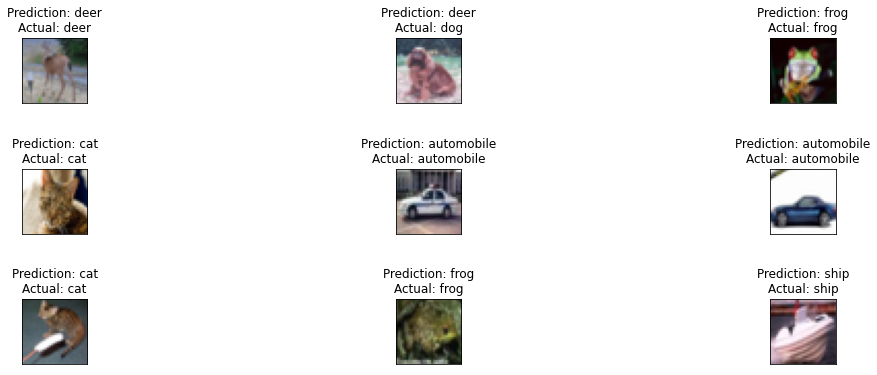

In [12]:
fig, axs = plt.subplots(3, 3, figsize = (19, 6))
fig.subplots_adjust(hspace = 1)
axs = axs.flatten()

for i, img in enumerate(batch):
    for key, value in class_labels.items():
        if class_result[i] == key:
            title = 'Prediction: {}\nActual: {}'.format(class_labels[key],class_labels[labels[i]])
            axs[i].set_title(title)
            axs[i].axes.get_xaxis().set_visible(False)
            axs[i].axes.get_yaxis().set_visible(False)
    #plot the image
    axs[i].imshow(img)
    
#show the plot
plt.show()